<a href="https://colab.research.google.com/github/Akashwadile21/Data-Science-Project/blob/main/Walmart_Data_using_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
uploaded=files.upload()

Saving Walmart (1).csv to Walmart (1).csv


In [5]:
#Load and read dataset
df_walmart = pd.read_csv('Walmart (1).csv')
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#Check the shape
df_walmart.shape

(6435, 8)

In [7]:
#Check the columns
df_walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
df_walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
df_walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df_walmart.duplicated().sum()

0

In [11]:
df_walmart['Date']=pd.to_datetime(df_walmart['Date'])

<ipython-input-11-1ffcbff77b01>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_walmart['Date']=pd.to_datetime(df_walmart['Date'])


In [12]:
df_walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
#extract year, quarter,month,day
df1=df_walmart.copy()
df_walmart['Year']=df_walmart['Date'].dt.year
df_walmart['quarter']=df_walmart['Date'].dt.quarter
df_walmart['month']=df_walmart['Date'].dt.month
df_walmart['month_namee']=df_walmart['Date'].dt.month_name()
df_walmart['Day']=df_walmart['Date'].dt.day
df_walmart['Day_name']=df_walmart['Date'].dt.day_name()
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,quarter,month,month_namee,Day,Day_name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,May,2,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,4,12,December,2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,February,19,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,February,26,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2,5,May,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,3,9,September,28,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,2,5,May,10,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,4,12,December,10,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,4,10,October,19,Friday


In [14]:
df_walmart.dtypes.value_counts()

int64             6
float64           5
object            2
datetime64[ns]    1
dtype: int64

In [15]:
df_walmart['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

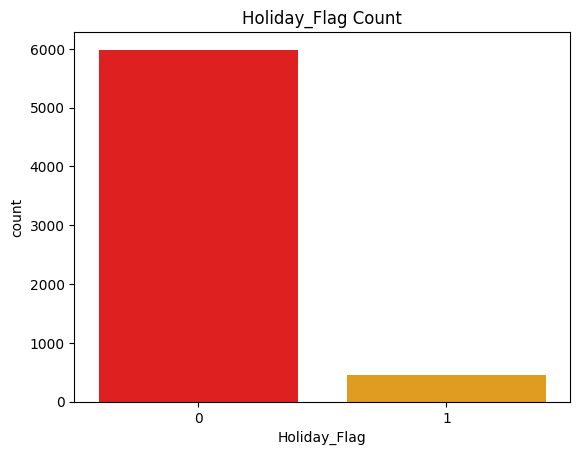

In [16]:
from seaborn.rcmod import palettes
#visuliaztion
sns.countplot(x=df_walmart['Holiday_Flag'],palette=['Red','Orange'])
plt.title('Holiday_Flag Count')
plt.show()

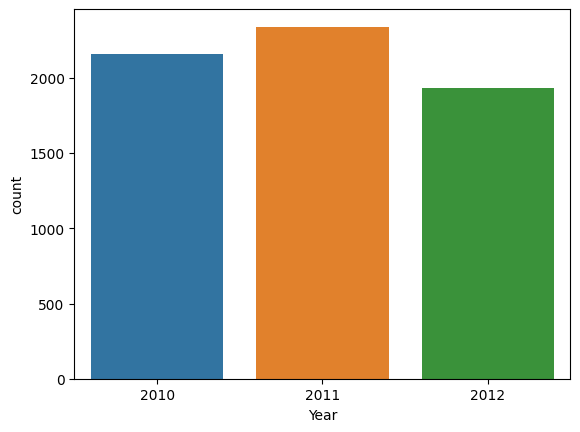

In [17]:
sns.countplot(x=df_walmart['Year'])
plt.show()

In [18]:
#countplot for year each holiday_flag
a1=df_walmart.groupby(['Year','Holiday_Flag'])['Year'].count()  #hue=
a1

Year  Holiday_Flag
2010  0               1980
      1                180
2011  0               2160
      1                180
2012  0               1845
      1                 90
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

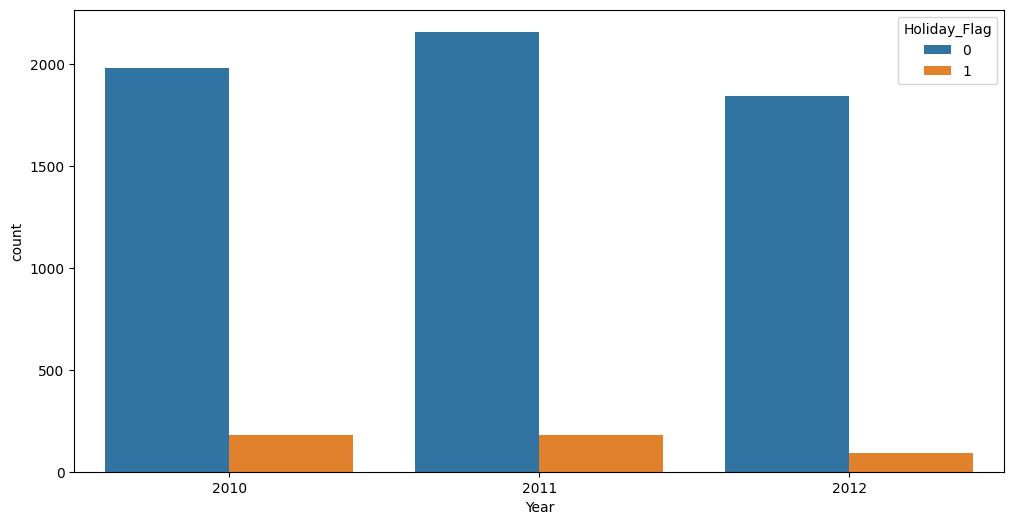

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_walmart,x='Year',hue='Holiday_Flag')

In [20]:
num_cols=df_walmart.dtypes[df_walmart.dtypes!='object'].index
num_cols

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'quarter', 'month', 'Day'],
      dtype='object')

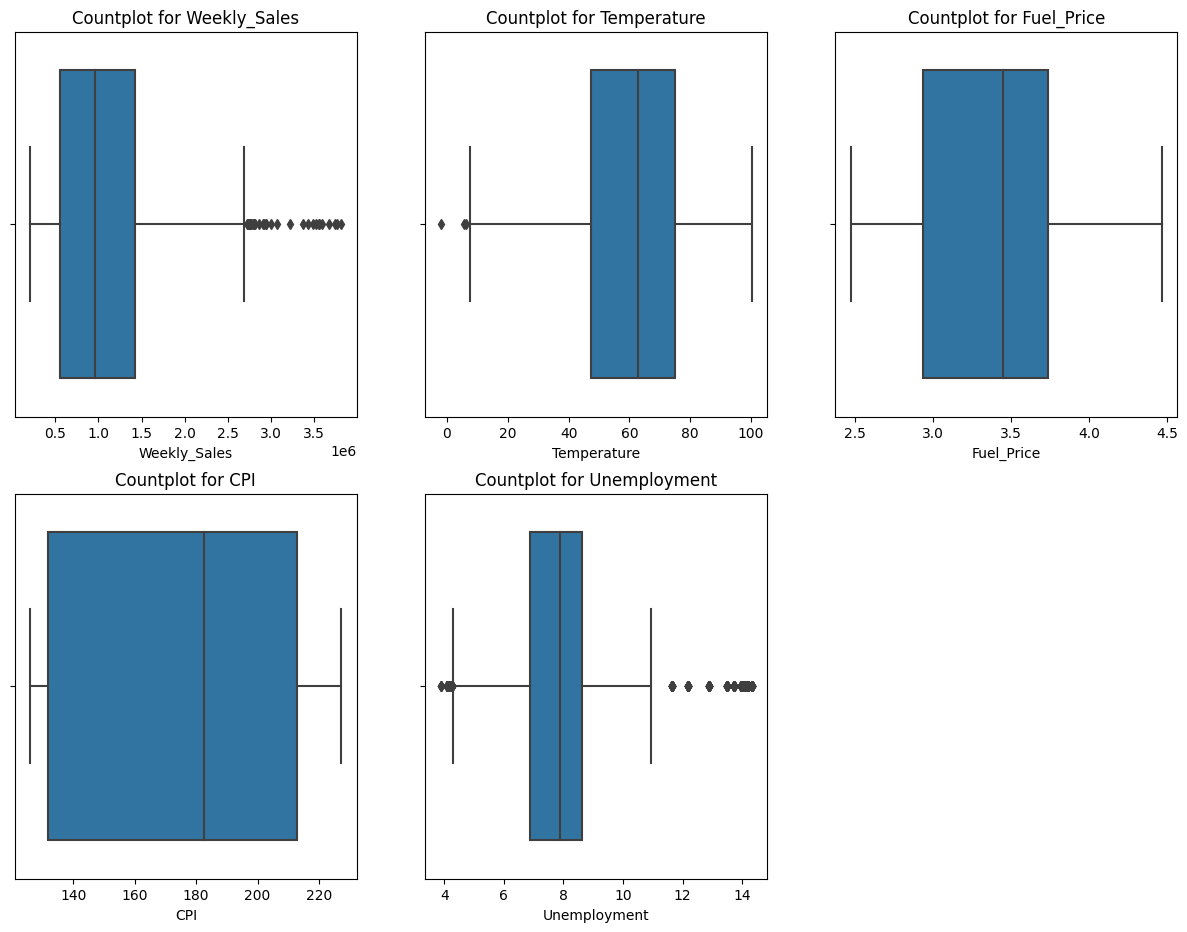

In [32]:
cols=['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment']
plt.figure(figsize=(15,11))#15 is width and 11 height
for i in range(len(cols)):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=df_walmart[cols[i]])
  plt.title(f"Countplot for {cols[i]}")
plt.show()

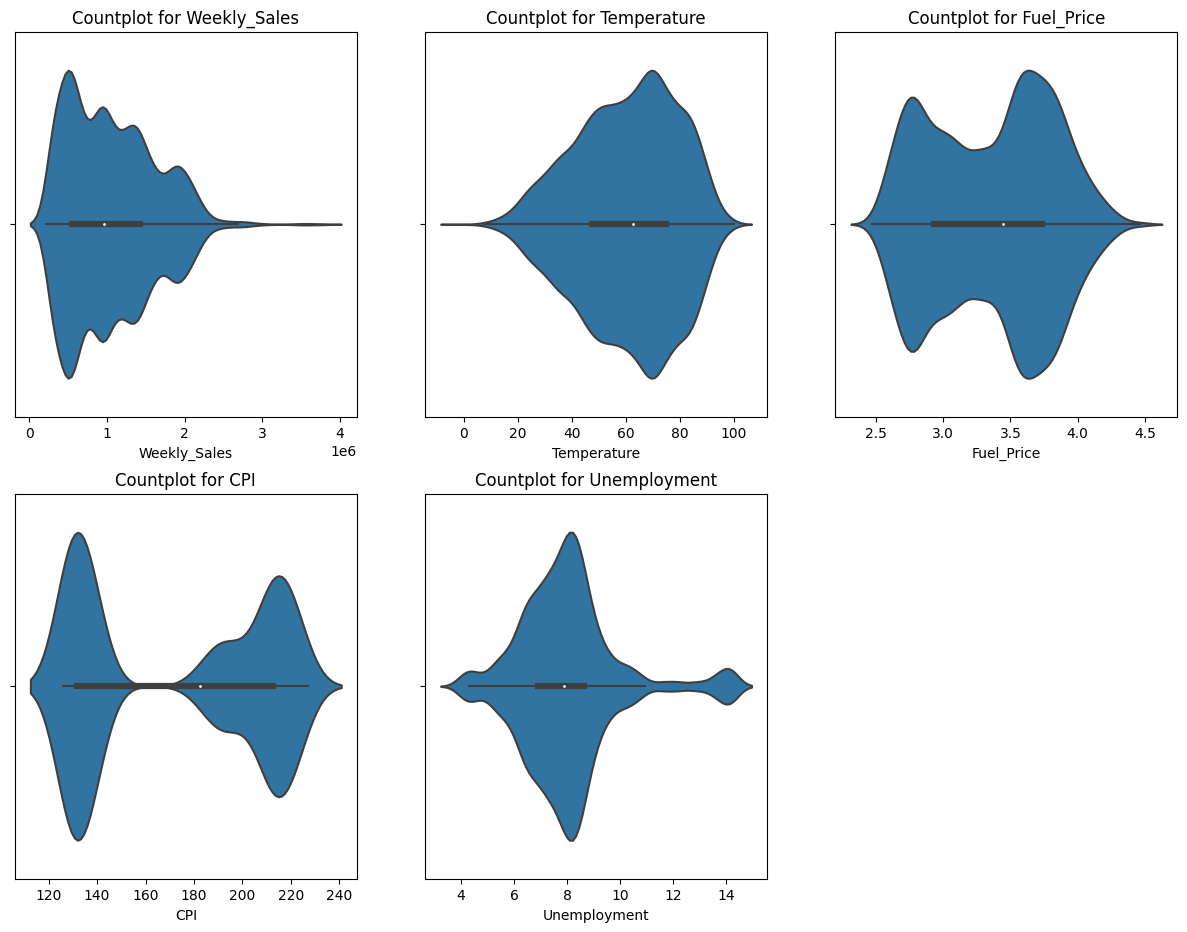

In [33]:
#violin plot combination of boxplot and kde(kernal desnsity plot)

cols=['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment']
plt.figure(figsize=(15,11))#15 is width and 11 height
for i in range(len(cols)):
  plt.subplot(2,3,i+1)
  sns.violinplot(x=df_walmart[cols[i]])
  plt.title(f"Countplot for {cols[i]}")
plt.show()

In [34]:
#scatter plot represent corelation
num_cols

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'quarter', 'month', 'Day'],
      dtype='object')

<Axes: xlabel='Weekly_Sales', ylabel='Fuel_Price'>

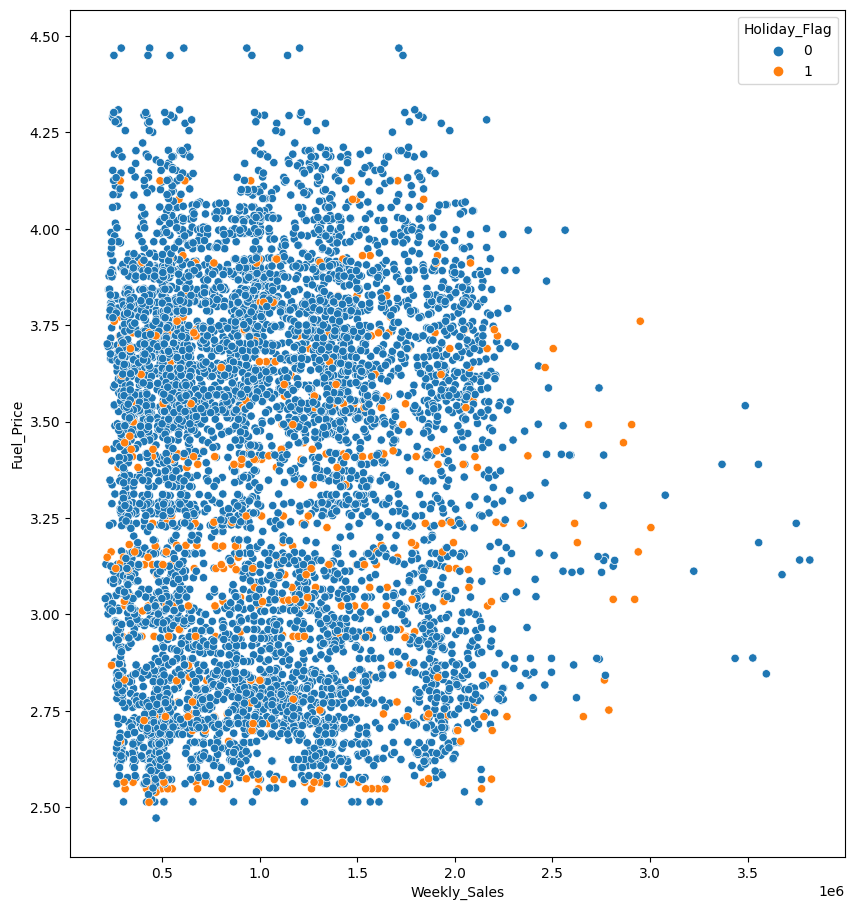

In [37]:
plt.figure(figsize=(10,11))
sns.scatterplot(data=df_walmart,x='Weekly_Sales',y='Fuel_Price',hue='Holiday_Flag')

<Figure size 1300x1100 with 0 Axes>

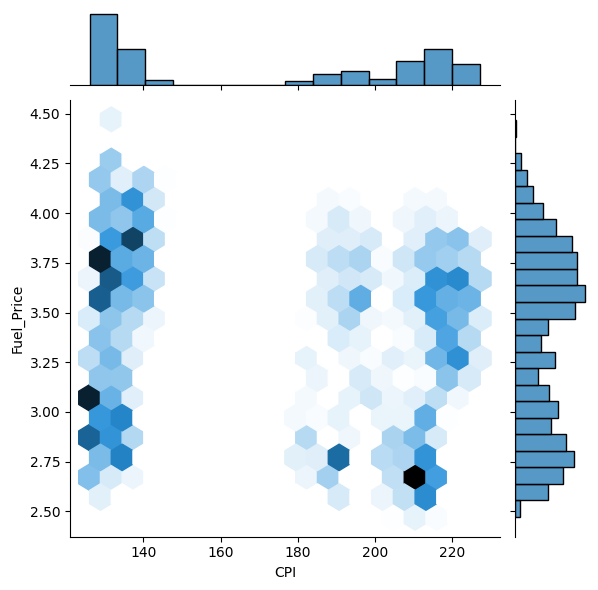

In [40]:
#joinplot
plt.figure(figsize=(13,11))
sns.jointplot(data=df_walmart,x='CPI',y='Fuel_Price',kind='hex')

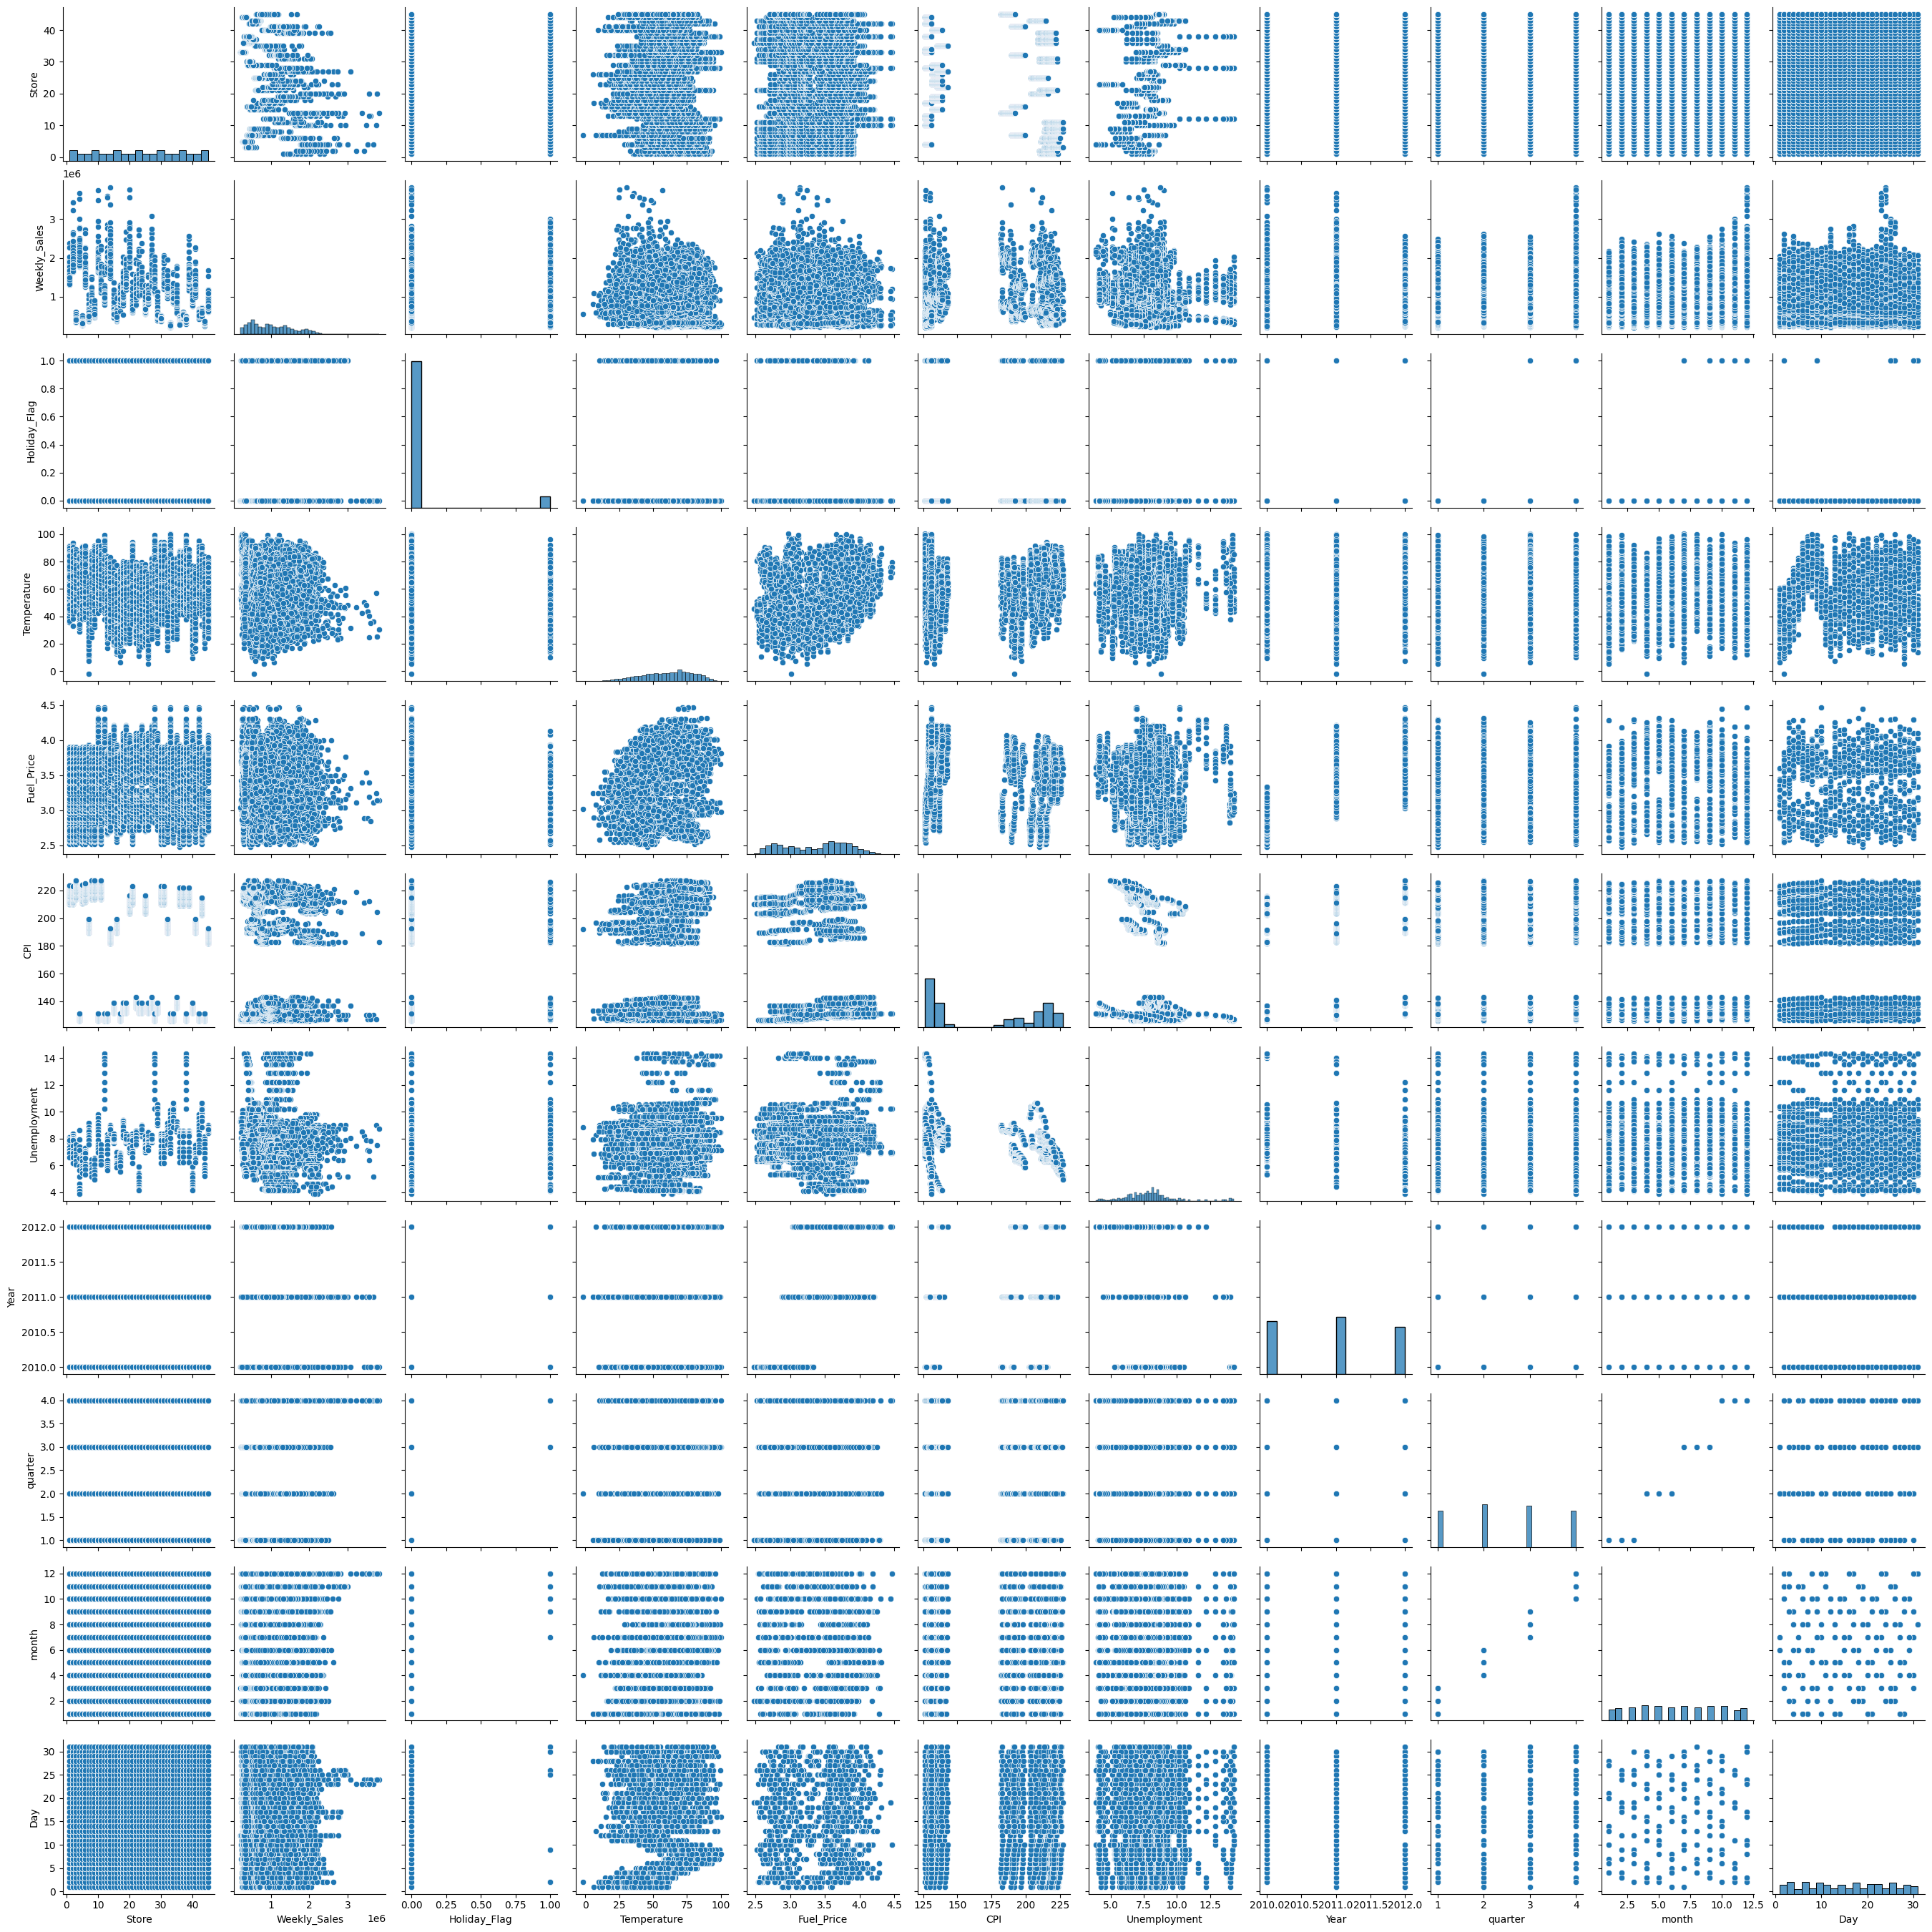

In [42]:
#pairplot #reprent corelation
sns.pairplot(df_walmart)

In [45]:
corr=df_walmart.corr()

<ipython-input-45-d335aae6a710>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_walmart.corr()
